# The script consists of the Following

### Customer Profiling basis Age, Income, Number of Dependents

### Visualization basis customer profiling

### Aggregation (Customer Profiles)

### Comparing customer profiles with regions and departments

### Data Points for Sales and Marketing team including busiest day, hour, department.

In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\Users\Bhati\OneDrive\Desktop\CF\Data Analytics Immersion\Achievement 4\11-Apr-2023 Instacart Basket Analysis'

In [3]:
# Importing High Activity Customer Data
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'High_activity_customers.pkl'))

In [4]:
# Importing department Data
df_department = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'), index_col = False)

Checking Imported DataFrames

In [5]:
df.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,order_freq_flag,gender,state,age,date_joined,Number_of_dependents,family_status,income,region,activity_flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,high activity
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,high activity
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,...,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,high activity
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,high activity
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,...,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,high activity


In [6]:
df.shape

(30964564, 32)

In [7]:
df_department.head()

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [8]:
# Rename unnamed column to department id
df_department.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)

In [9]:
df_department.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [10]:
df_department.shape

(21, 2)

# Customer Profiling

The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

## Age

In [11]:
# Checking descriptive statistics of age
df['age'].describe()

count    3.096456e+07
mean     4.946803e+01
std      1.848528e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

**Customers will be grouped as per the following**

Young Adult : 18-39
Middle Aged : 40-65
Senior : 65+

In [12]:
# Creating age groups
df.loc[(df['age'] >= 18) & (df['age'] < 40), 'age_group'] = 'Young Adult'
df.loc[(df['age'] >= 40) & (df['age'] < 65), 'age_group'] = 'Middle Aged'
df.loc[df['age'] >= 65, 'age_group'] = 'Senior'

In [13]:
# Checking age_group counts
df['age_group'].value_counts(dropna = False)

Middle Aged    12103910
Young Adult    10665110
Senior          8195544
Name: age_group, dtype: int64

## Income

In [14]:
# Checking descriptive statistics of income
df['income'].describe()

count    3.096456e+07
mean     9.967587e+04
std      4.314187e+04
min      2.590300e+04
25%      6.729200e+04
50%      9.676500e+04
75%      1.281020e+05
max      5.939010e+05
Name: income, dtype: float64

**Customer will be grouped as per the following**

Based on Pew Research Definition of income:https://money.usnews.com/money/personal-finance/family-finance/articles/where-do-i-fall-in-the-american-economic-class-system

Low : < 52,200
Middle : 52,200 - 156,600
High : > 156,600

In [15]:
# Creating income groups
df.loc[df['income'] < 52200, 'income_group'] = 'Low'
df.loc[(df['income'] >= 52200) & (df['income'] < 156600), 'income_group'] = 'Middle'
df.loc[df['income'] >= 156600, 'income_group'] = 'High'

In [16]:
# Checking income_group counts
df['income_group'].value_counts(dropna = False)

Middle    24541333
Low        3691708
High       2731523
Name: income_group, dtype: int64

## Number of Dependents

In [17]:
# Checking descriptive statistics of dependents column
df['Number_of_dependents'].describe()

count    3.096456e+07
mean     1.501819e+00
std      1.118896e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: Number_of_dependents, dtype: float64

Number of dependents fall in the range of 0-3

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30964564 entries, 0 to 32404847
Data columns (total 34 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   product_id              int64  
 1   product_name            object 
 2   aisle_id                int64  
 3   department_id           int64  
 4   prices                  float64
 5   order_id                int64  
 6   user_id                 int64  
 7   order_number            int64  
 8   orders_day_of_week      int64  
 9   order_hour_of_day       int64  
 10  days_since_prior_order  float64
 11  add_to_cart_order       int64  
 12  reordered               int64  
 13  price_range_loc         object 
 14  busiest day             object 
 15  busiest days            object 
 16  busiest_period_of_day   object 
 17  max_order               int64  
 18  loyalty_flag            object 
 19  avg_price               float64
 20  spending_flag           object 
 21  median_freq             float

In [19]:
# Creating a crosstab between number of dependents and family status
crosstab = pd.crosstab(df['family_status'], df['Number_of_dependents'], dropna = False)

In [20]:
crosstab

Number_of_dependents,0,1,2,3
family_status,,,,
divorced/widowed,2645271,0,0,0
living with parents and siblings,0,508045,484658,488469
married,0,7211061,7248603,7284047
single,5094410,0,0,0


Dependents are defined, it could be children, spouse, elderly parents etc. Hence creating a new column of family size

In [21]:
# Create a family size group
df.loc[df['Number_of_dependents'] == 0, 'household_size'] = 'Single'
df.loc[(df['Number_of_dependents'] == 1) | (df['Number_of_dependents'] == 2), 'household_size'] = 'Medium Family'
df.loc[df['Number_of_dependents'] == 3, 'household_size'] = 'Large Family'

In [22]:
# Checking the dependent count
df['household_size'].value_counts(dropna = False)

Medium Family    15452367
Large Family      7772516
Single            7739681
Name: household_size, dtype: int64

In [173]:
# Creating a crosstab between dependents and family status
crosstab_fam = pd.crosstab(df['age_group'], df['family_status'], dropna = False)

In [174]:
crosstab_fam

family_status,divorced/widowed,living with parents and siblings,married,single
age_group,,,,
Middle Aged,623313,0,9046762,2433835
Senior,2021958,0,6173586,0
Young Adult,0,1481172,6523363,2660575


## Department

In [25]:
# Create a data dictionary for departments
data_dict = df_department.set_index('department_id')['department'].to_dict()

In [26]:
data_dict

{1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli',
 21: 'missing'}

In [27]:
# Creating a new column to convert department_id
df['department'] = df['department_id'].map(data_dict)

In [28]:
# Checking the values of department_id
df['department'].value_counts(dropna = False)

produce            9079273
dairy eggs         5177182
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: department, dtype: int64

## Evaluating Order as per time of day and week

In [31]:
df['order_hour_of_day'].value_counts (dropna = False)

10    2649744
11    2614880
14    2567903
13    2539276
15    2535966
12    2495795
16    2413681
9     2363611
17    1982345
8     1659110
18    1551184
19    1193878
20     930909
7      863213
21     763111
22     607060
23     384554
6      281013
0      208042
1      109621
5       84418
2       65691
4       50763
3       48796
Name: order_hour_of_day, dtype: int64

**Grouping hours basis day time**

Day: 8:00am to 4:59pm
Evening: 5:00pm to 11:59pm
Overnight/Early Morning: 12:00am to 7:59am

In [32]:
df.loc[df['order_hour_of_day'].isin([8, 9, 10, 11, 12, 13, 14, 15, 16]), 'time_of_order'] = 'Day'
df.loc[df['order_hour_of_day'].isin([17, 18, 19, 20, 21, 22, 23]), 'time_of_order'] = 'Evening'
df.loc[df['order_hour_of_day'].isin([ 0, 1, 2, 3, 4, 5, 6, 7]), 'time_of_order'] = 'Overnight'

In [33]:
# Checking time_of_order counts
df['time_of_order'].value_counts(dropna = False)

Day          21839966
Evening       7413041
Overnight     1711557
Name: time_of_order, dtype: int64

In [34]:
# Creating a crosstab between dependents and family status
crosstab_tim = pd.crosstab(df['family_status'], df['time_of_order'], dropna = False)

In [35]:
crosstab_tim

time_of_order,Day,Evening,Overnight
family_status,,,
divorced/widowed,1860966,636304,148001
living with parents and siblings,1039933,354775,86464
married,15348487,5201833,1193391
single,3590580,1220129,283701


In [36]:
df['orders_day_of_week'].value_counts()

0    5908610
1    5411686
6    4291304
5    4033729
2    4024706
3    3669535
4    3624994
Name: orders_day_of_week, dtype: int64

**Orders_day_of_week grouped as per the following**

Weekdays (2:Monday, 3:Tuesday:, 4:Wednesday, 5:Thursday, 6: Friday)

Weekend (0:Saturday, 1:Sunday)

In [37]:
df.loc[df['orders_day_of_week'].isin([2,3,4,5,6]), 'time_of_week'] = 'Weekdays'
df.loc[df['orders_day_of_week'].isin([0,1]), 'time_of_week'] = 'Weekend'

In [40]:
df['time_of_week'].value_counts(dropna = False)

Weekdays    19644268
Weekend     11320296
Name: time_of_week, dtype: int64

In [41]:
crosstab_week = pd.crosstab(df['time_of_week'], df['time_of_order'], dropna = False)

In [42]:
crosstab_week

time_of_order,Day,Evening,Overnight
time_of_week,,,
Weekdays,13589946,4905737,1148585
Weekend,8250020,2507304,562972


In [43]:
crosstab_tw = pd.crosstab(df['family_status'], df['time_of_week'], dropna = False)

In [44]:
crosstab_tw

time_of_week,Weekdays,Weekend
family_status,,
divorced/widowed,1683567,961704
living with parents and siblings,940862,540310
married,13803153,7940558
single,3216686,1877724


# Visualization

(array([0, 1, 2]),
 [Text(0, 0, 'Middle Aged'), Text(1, 0, 'Young Adult'), Text(2, 0, 'Senior')])

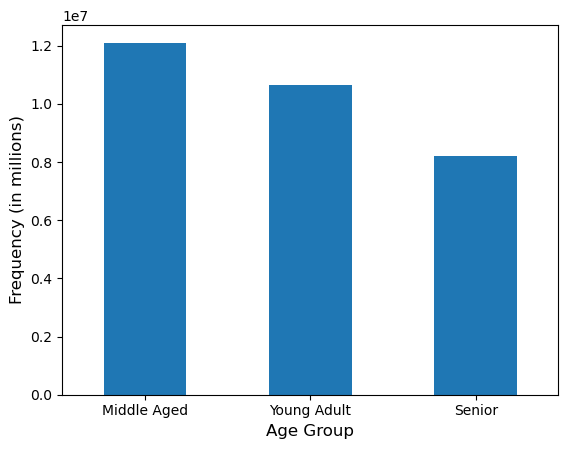

In [45]:
# Creating a bar chart for the age_group
bar_age_group = df['age_group'].value_counts().plot.bar()

plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Age Group', fontsize = 12)
plt.xticks(rotation = 0)

In [123]:
# Exporting the visualization
bar_age_group.figure.savefig(os.path.join(path, '04 Analysis', 'Visualization', 'distribution_age_group.png'))

(array([0, 1, 2]),
 [Text(0, 0, 'Middle'), Text(1, 0, 'Low'), Text(2, 0, 'High')])

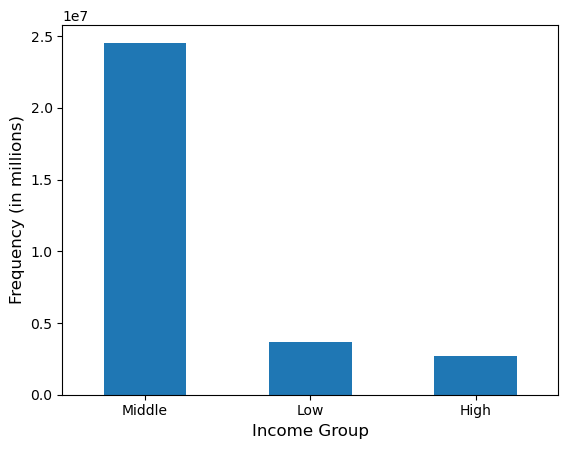

In [46]:
# Creating a bar chart for the income_group
bar_income_group = df['income_group'].value_counts().plot.bar()

plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Income Group', fontsize = 12)
plt.xticks(rotation = 0)

In [124]:
# Exporting the visualization
bar_income_group.figure.savefig(os.path.join(path, '04 Analysis', 'Visualization', 'distribution_income_group.png'))

(array([0, 1, 2]),
 [Text(0, 0, 'Medium Family'),
  Text(1, 0, 'Large Family'),
  Text(2, 0, 'Single')])

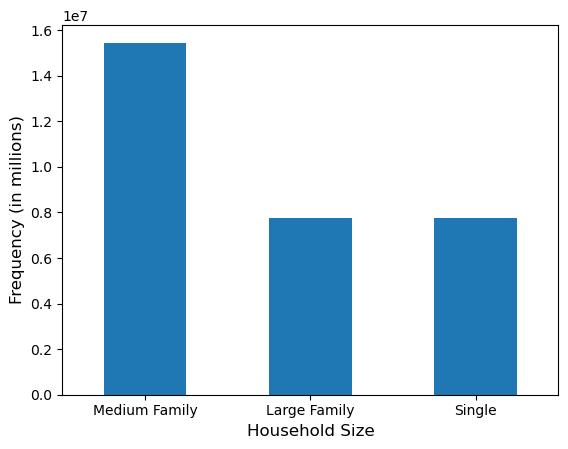

In [47]:
# Creating a bar chart for the household_size
bar_household_size = df['household_size'].value_counts().plot.bar()

plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Household Size', fontsize = 12)
plt.xticks(rotation = 0)

In [125]:
# Exporting the visualization
bar_household_size.figure.savefig(os.path.join(path, '04 Analysis', 'Visualization', 'distribution_household_size.png'))

Text(0.5, 0, 'Departments')

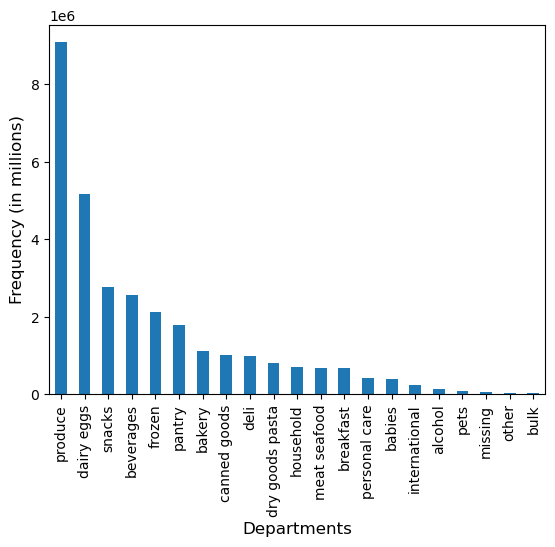

In [49]:
# Creating a bar chart for the departments
bar_department = df['department'].value_counts().plot.bar()

plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Departments', fontsize = 12)

In [126]:
# Exporting the visualization
bar_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualization', 'distribution_department.png'))

Text(0.5, 0, 'Age Group')

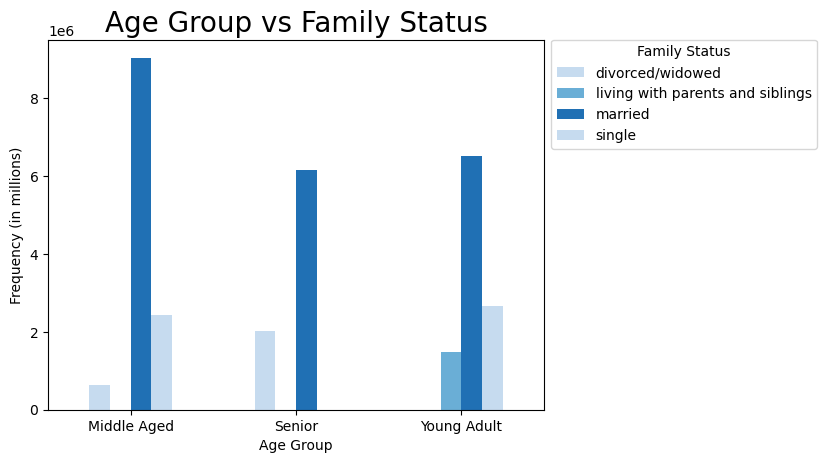

In [178]:
# Creating a bar chart for Age group and family status
bar_age_fam = crosstab_fam.plot(kind = 'bar', rot = 0, color = sns.color_palette('Blues', 3))
bar_age_fam.legend(title = 'Family Status', bbox_to_anchor = (1, 1.02), loc = 'upper left')
plt.title('Age Group vs Family Status', fontsize = 20)
plt.ylabel('Frequency (in millions)')
plt.xlabel('Age Group')

In [179]:
# Exporting the visualization
bar_age_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualization', 'age_group_vs_family_size.png'), bbox_inches='tight')

(array([0, 1, 2]),
 [Text(0, 0, 'Day'), Text(1, 0, 'Evening'), Text(2, 0, 'Overnight')])

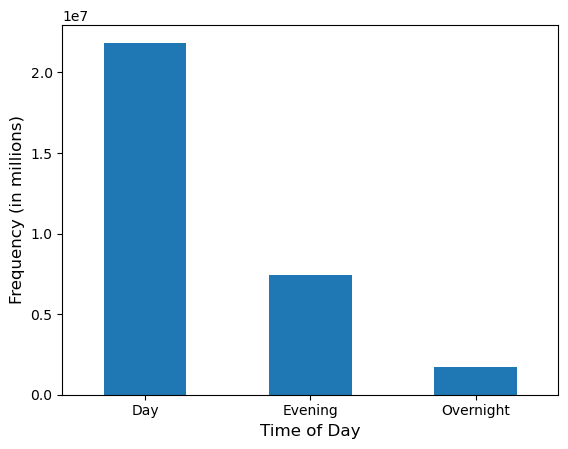

In [51]:
# Creating a bar chart for the orders made as per the time of the day
bar_tod = df['time_of_order'].value_counts().plot.bar()

plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Time of Day', fontsize = 12)
plt.xticks(rotation = 0)


In [127]:
# Exporting the visualization
bar_tod.figure.savefig(os.path.join(path, '04 Analysis', 'Visualization', 'distribution_time_of_day.png'))

# Aggregation (customer profiles)

In [54]:
# Age_group aggregation by usage frequency
df.groupby('age_group').agg({'add_to_cart_order' : ['mean', 'min', 'max']})

add_to_cart_order         
                         mean min  max
age_group                             
Middle Aged          8.354216   1  145
Senior               8.307779   1   99
Young Adult          8.415515   1  109

In [56]:
# Age_group aggregation by expenditure
df.groupby('age_group').agg({'prices' : ['mean', 'min', 'max']})

prices              
                  mean  min      max
age_group                           
Middle Aged  11.944899  1.0  99999.0
Senior       11.757768  1.0  99999.0
Young Adult  12.055665  1.0  99999.0

max value as 99999 for a single supermarket product do not make sense, hence fixing the same

In [62]:
df['prices'].value_counts(dropna = False).sort_index()

1.0        109262
1.1        232337
1.2        242681
1.3        407143
1.4        374799
            ...  
24.8          386
24.9         5466
25.0        13128
14900.0      4223
99999.0       654
Name: prices, Length: 242, dtype: int64

In [63]:
# calculate the mode of the prices
mode_value = df['prices'].mode()[0]

In [64]:
mode_value

12.3

In [65]:
# create new column with modified values
df['prices_mod'] = df['prices'].replace([14900, 99999], mode_value)

In [66]:
# Age_group aggregation by expenditure
df.groupby('age_group').agg({'prices_mod' : ['mean', 'min', 'max']})

prices_mod           
                  mean  min   max
age_group                        
Middle Aged   7.792248  1.0  25.0
Senior        7.797417  1.0  25.0
Young Adult   7.785525  1.0  25.0

In [67]:
# Income_group aggregation by usage frequency
df.groupby('income_group').agg({'add_to_cart_order' : ['mean', 'min', 'max']})

add_to_cart_order         
                          mean min  max
income_group                           
High                  8.526584   1  121
Low                   7.389054   1  137
Middle                8.491350   1  145

In [68]:
# Income Group aggregation by expenditure
df.groupby('income_group').agg({'prices_mod' : ['mean', 'min', 'max']})

prices_mod           
                   mean  min   max
income_group                      
High           7.942472  1.0  25.0
Low            6.766241  1.0  25.0
Middle         7.928672  1.0  25.0

In [69]:
# Family size aggregation by usage frequency
df.groupby('household_size').agg({'add_to_cart_order' : ['mean', 'min', 'max']})

add_to_cart_order         
                            mean min  max
household_size                           
Large Family            8.375061   1  145
Medium Family           8.370250   1  114
Single                  8.336567   1  137

In [70]:
# Family size aggregation by expenditure
df.groupby('household_size').agg({'prices_mod' : ['mean', 'min', 'max']})

prices_mod           
                     mean  min   max
household_size                      
Large Family     7.793586  1.0  25.0
Medium Family    7.790685  1.0  25.0
Single           7.790233  1.0  25.0

# Comparing customer profiles with regions and departments

In [71]:
# Comparing age_group across regions
crosstab_age_region = pd.crosstab(df['region'], df['age_group'], dropna = False)

In [72]:
crosstab_age_region

age_group,Middle Aged,Senior,Young Adult
region,,,
Midwest,2874466,1904046,2483001
Northeast,2108141,1484807,1871737
South,3994431,2708461,3608247
West,3126872,2098230,2702125


Text(0.5, 0, 'Regions')

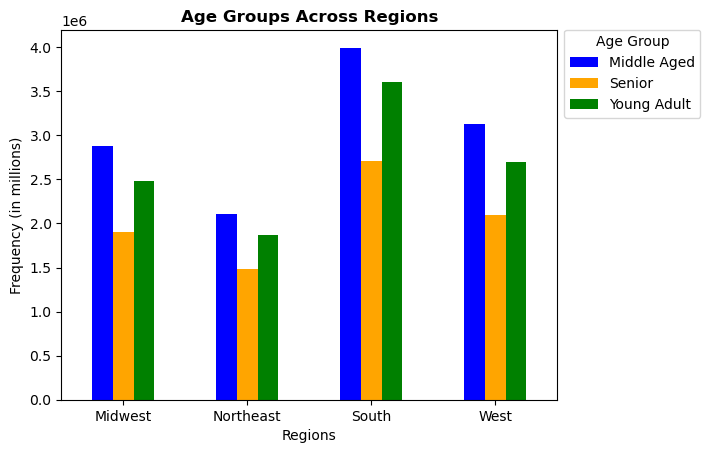

In [129]:
# Creating a bar chart for age_group and region
bar_age_region = crosstab_age_region.plot(kind = 'bar', rot = 0, color = ['blue','orange', 'green'])
bar_age_region.legend(title = 'Age Group', bbox_to_anchor = (1, 1.02), loc = 'upper left')
plt.title('Age Groups Across Regions', fontweight = 'bold')
plt.ylabel('Frequency (in millions)')
plt.xlabel('Regions')

In [161]:
# Exporting the visualization
bar_age_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualization', 'age_group_across_region.png'), bbox_inches='tight')

In [81]:
# Compare age groups across departments
crosstab_age_dep = pd.crosstab(df['department'], df['age_group'], dropna = False)

In [82]:
crosstab_age_dep

age_group,Middle Aged,Senior,Young Adult
department,,,
alcohol,56278,36693,51656
babies,162732,106204,141456
bakery,438829,295997,386002
beverages,1013708,684020,874173
breakfast,263615,175296,231939
bulk,12882,8945,11624
canned goods,394849,267509,349716
dairy eggs,2015807,1368072,1793303
deli,392790,265199,345845


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'alcohol'),
  Text(1, 0, 'babies'),
  Text(2, 0, 'bakery'),
  Text(3, 0, 'beverages'),
  Text(4, 0, 'breakfast'),
  Text(5, 0, 'bulk'),
  Text(6, 0, 'canned goods'),
  Text(7, 0, 'dairy eggs'),
  Text(8, 0, 'deli'),
  Text(9, 0, 'dry goods pasta'),
  Text(10, 0, 'frozen'),
  Text(11, 0, 'household'),
  Text(12, 0, 'international'),
  Text(13, 0, 'meat seafood'),
  Text(14, 0, 'missing'),
  Text(15, 0, 'other'),
  Text(16, 0, 'pantry'),
  Text(17, 0, 'personal care'),
  Text(18, 0, 'pets'),
  Text(19, 0, 'produce'),
  Text(20, 0, 'snacks')])

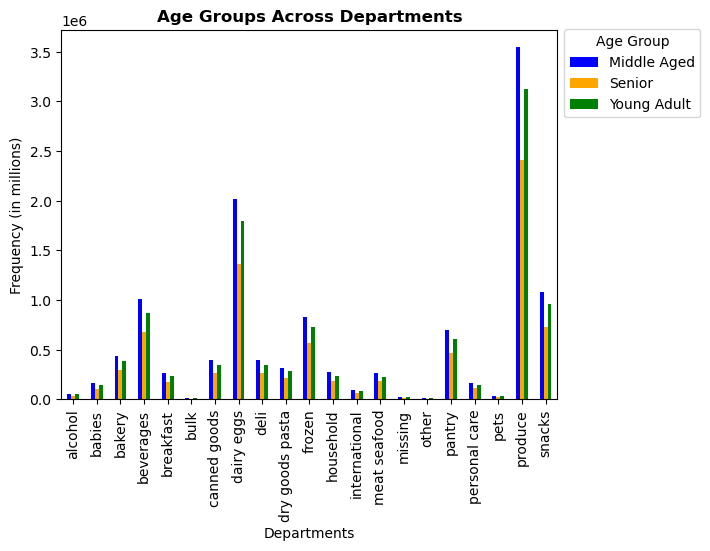

In [131]:
# Create a bar chart for age_group and department
bar_age_department = crosstab_age_dep.plot(kind = 'bar', rot = 0, color = ['blue', 'orange', 'green'])
bar_age_department.legend(title = 'Age Group', bbox_to_anchor = (1, 1.02), loc = 'upper left')
plt.title('Age Groups Across Departments', fontweight = 'bold')
plt.ylabel('Frequency (in millions)')
plt.xlabel('Departments')
plt.xticks(rotation = 90)

In [132]:
# Exporting the visualization
bar_age_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualization', 'age_group_across_department.png'))

In [89]:
# Compare income groups across regions
crosstab_income_reg = pd.crosstab(df['region'], df['income_group'], dropna = False)

In [90]:
crosstab_income_reg

income_group,High,Low,Middle
region,,,
Midwest,635230,864462,5761821
Northeast,475835,648484,4340366
South,920051,1257064,8134024
West,700407,921698,6305122


Text(0.5, 0, 'Regions')

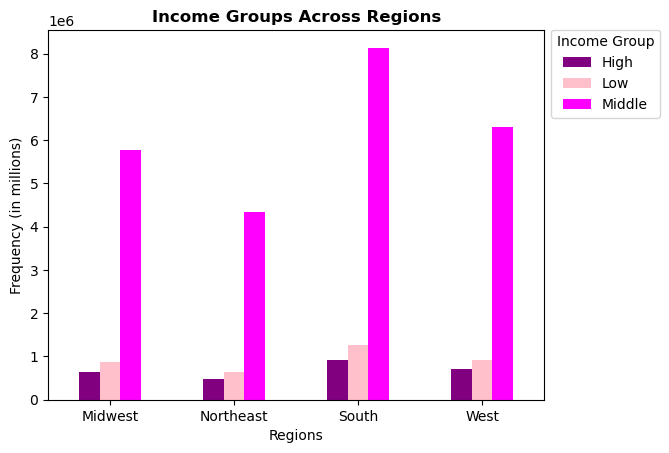

In [133]:
# Creating a bar chart for income group and region
bar_income_region = crosstab_income_reg.plot(kind = 'bar', rot = 0, color = ['purple','pink', 'magenta'])
bar_income_region.legend(title = 'Income Group', bbox_to_anchor = (1, 1.02), loc = 'upper left')
plt.title('Income Groups Across Regions', fontweight = 'bold')
plt.ylabel('Frequency (in millions)')
plt.xlabel('Regions')

In [164]:
# Exporting the visualization
bar_income_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualization', 'Income_group_across_region.png'), bbox_inches='tight')

In [92]:
# Compare income groups across departments
crosstab_income_dep = pd.crosstab(df['department'], df['income_group'], dropna = False)

In [93]:
crosstab_income_dep

income_group,High,Low,Middle
department,,,
alcohol,18471,19346,106810
babies,37021,34026,339345
bakery,106473,118157,896198
beverages,222318,413096,1936487
breakfast,57630,99160,514060
bulk,2403,5060,25988
canned goods,93729,88560,829785
dairy eggs,462999,555091,4159092
deli,88793,116835,798206


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'alcohol'),
  Text(1, 0, 'babies'),
  Text(2, 0, 'bakery'),
  Text(3, 0, 'beverages'),
  Text(4, 0, 'breakfast'),
  Text(5, 0, 'bulk'),
  Text(6, 0, 'canned goods'),
  Text(7, 0, 'dairy eggs'),
  Text(8, 0, 'deli'),
  Text(9, 0, 'dry goods pasta'),
  Text(10, 0, 'frozen'),
  Text(11, 0, 'household'),
  Text(12, 0, 'international'),
  Text(13, 0, 'meat seafood'),
  Text(14, 0, 'missing'),
  Text(15, 0, 'other'),
  Text(16, 0, 'pantry'),
  Text(17, 0, 'personal care'),
  Text(18, 0, 'pets'),
  Text(19, 0, 'produce'),
  Text(20, 0, 'snacks')])

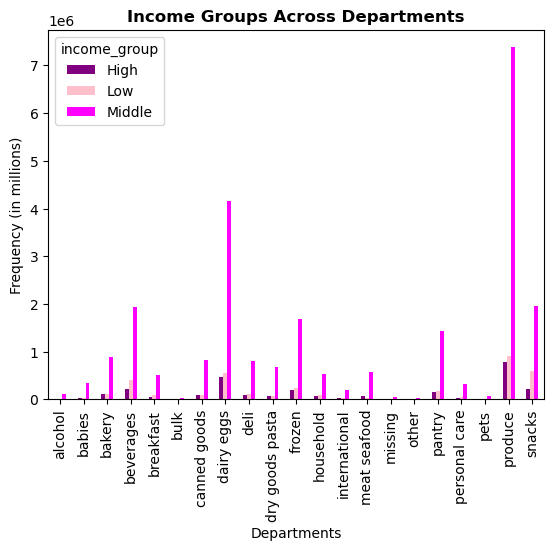

In [136]:
# Create a bar chart for income group and department
bar_income_department = crosstab_income_dep.plot(kind = 'bar', rot = 0, color = ['purple','pink', 'magenta'])
bar_age_department.legend(title = 'Income Group', bbox_to_anchor = (1, 1.02), loc = 'upper left')
plt.title('Income Groups Across Departments', fontweight = 'bold')
plt.ylabel('Frequency (in millions)')
plt.xlabel('Departments')
plt.xticks(rotation = 90)

In [137]:
# Exporting the visualization
bar_income_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualization', 'Income_group_across_department.png'))

In [95]:
# Compare family size across regions
crosstab_family_reg = pd.crosstab(df['region'], df['household_size'], dropna = False)


In [96]:
crosstab_family_reg

household_size,Large Family,Medium Family,Single
region,,,
Midwest,1787286,3651411,1822816
Northeast,1381233,2728970,1354482
South,2585864,5143342,2581933
West,2018133,3928644,1980450


Text(0.5, 0, 'Regions')

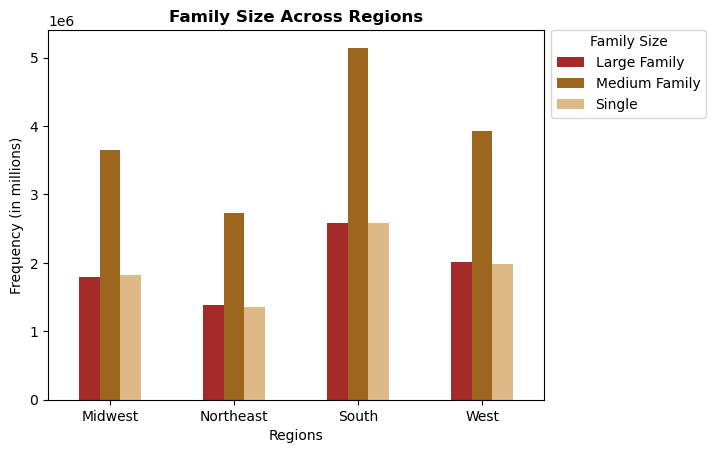

In [138]:
# Creating a bar chart for family size and region
bar_family_region = crosstab_family_reg.plot(kind = 'bar', rot = 0, color = ['#A52A2A','#9C661F', '#DEB887'])
bar_family_region.legend(title = 'Family Size', bbox_to_anchor = (1, 1.02), loc = 'upper left')
plt.title('Family Size Across Regions', fontweight = 'bold')
plt.ylabel('Frequency (in millions)')
plt.xlabel('Regions')

In [163]:
# Exporting the visualization
bar_family_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualization', 'Family_size_across_region.png'), bbox_inches='tight')

In [99]:
# Compare family size across departments
crosstab_family_dep = pd.crosstab(df['department'], df['household_size'], dropna = False)

In [100]:
crosstab_family_dep

household_size,Large Family,Medium Family,Single
department,,,
alcohol,37333,70467,36827
babies,102585,204479,103328
bakery,279822,559611,281395
beverages,640927,1285633,645341
breakfast,167322,337096,166432
bulk,8403,17048,8000
canned goods,255325,505729,251020
dairy eggs,1296264,2586542,1294376
deli,252592,497860,253382


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'alcohol'),
  Text(1, 0, 'babies'),
  Text(2, 0, 'bakery'),
  Text(3, 0, 'beverages'),
  Text(4, 0, 'breakfast'),
  Text(5, 0, 'bulk'),
  Text(6, 0, 'canned goods'),
  Text(7, 0, 'dairy eggs'),
  Text(8, 0, 'deli'),
  Text(9, 0, 'dry goods pasta'),
  Text(10, 0, 'frozen'),
  Text(11, 0, 'household'),
  Text(12, 0, 'international'),
  Text(13, 0, 'meat seafood'),
  Text(14, 0, 'missing'),
  Text(15, 0, 'other'),
  Text(16, 0, 'pantry'),
  Text(17, 0, 'personal care'),
  Text(18, 0, 'pets'),
  Text(19, 0, 'produce'),
  Text(20, 0, 'snacks')])

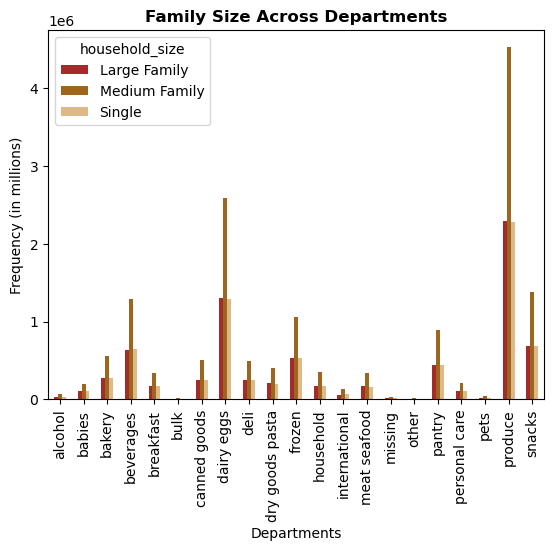

In [140]:
# Create a bar chart for family size and department
bar_family_department = crosstab_family_dep.plot(kind = 'bar', rot = 0, color = ['#A52A2A','#9C661F', '#DEB887'])
bar_age_department.legend(title = 'Family Size', bbox_to_anchor = (1, 1.02), loc = 'upper left')
plt.title('Family Size Across Departments', fontweight = 'bold')
plt.ylabel('Frequency (in millions)')
plt.xlabel('Departments')
plt.xticks(rotation = 90)

In [141]:
# Exporting the visualization
bar_family_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualization', 'family_size_across_department.png'))

**On comparing different customer profiles with region and departments, it is found that Region: south and department: Produce is leading across the profiles**

# Data Points for Sales and Marketing team

## Busiest Days of the week

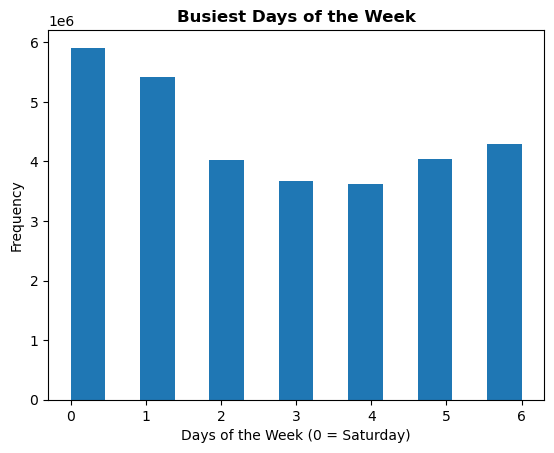

In [102]:
# Creating bar chart
busiest_days = df['orders_day_of_week'].plot.hist(bins = 13)
plt.title('Busiest Days of the Week', fontweight = 'bold')
plt.xlabel('Days of the Week (0 = Saturday)')
plt.show()

In [142]:
# Exporting visualization
busiest_days.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'busiest_day_of_week.png'))

Busiest days are Saturday, Sunday followed by Friday

## Busiest hour of the day

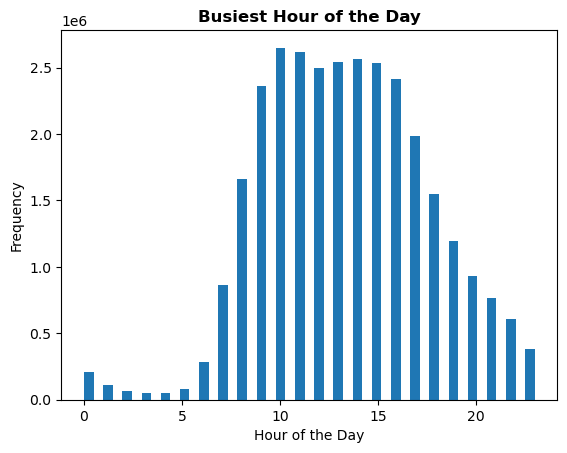

In [103]:
# Creating a bar chart
busiest_hours = df['order_hour_of_day'].plot.hist(bins = 47)
plt.title('Busiest Hour of the Day', fontweight = 'bold')
plt.xlabel('Hour of the Day')
plt.show()

In [143]:
# Exporting visualization
busiest_hours.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'busiest_hour_of_day.png'))

## Busiest hours of the day based on price

In [104]:
# Finding total price spent based on hour of day
busiest_hours_price = df.groupby('order_hour_of_day').agg({'prices_mod' : ['sum']})
busiest_hours_price = busiest_hours_price.sort_values(by=('prices_mod', 'sum'), ascending=False)
busiest_hours_price

,prices_mod
,sum
order_hour_of_day,
10,20532810.3
11,20320495.0
14,20037882.1
15,19796343.3
13,19790153.2
12,19444460.1
16,18834059.6
9,18324411.7


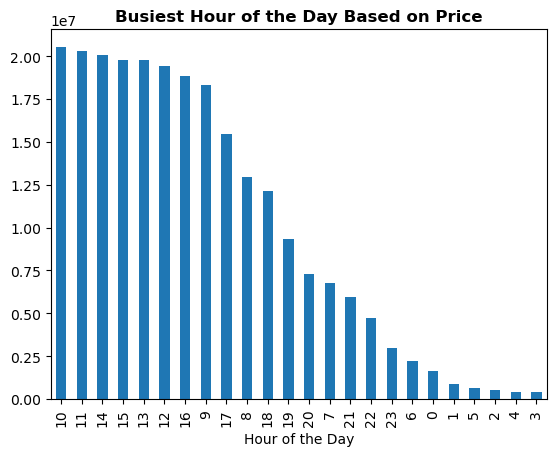

In [105]:
# Creating bar chart for busiest hour of the day based on price
busiest_hours_price_bar = busiest_hours_price.plot.bar(legend = None)
plt.title('Busiest Hour of the Day Based on Price', fontweight = 'bold')
plt.xlabel('Hour of the Day')
plt.show()

Busiest hour of the day is 10

In [144]:
# Exporting visualization
busiest_hours_price_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'busiest_hour_of_day_basis_price.png'))

## Busiest Department during busiest hour

In [106]:
busiest_hour_dept = df[df['order_hour_of_day'] == 10]

In [107]:
busiest_hour_dept['department'].value_counts(dropna = False)

produce            769161
dairy eggs         452024
snacks             253121
beverages          235794
frozen             161795
pantry             151101
bakery              94111
canned goods        85592
deli                84703
dry goods pasta     65753
household           60760
breakfast           59956
meat seafood        54477
personal care       35364
babies              33241
international       21558
alcohol             12694
pets                 7194
missing              5526
bulk                 2994
other                2825
Name: department, dtype: int64

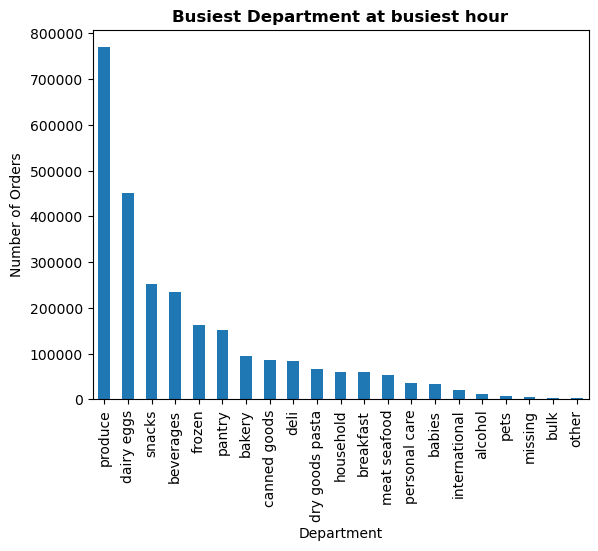

In [108]:
# Creating bar chart for departments at busiest hour of the day
dept_count = busiest_hour_dept['department'].value_counts(dropna=False)
busiest_dept = dept_count.plot.bar()
plt.title('Busiest Department at busiest hour', fontweight='bold')
plt.xlabel('Department')
plt.ylabel('Number of Orders')
plt.show()

In [145]:
# Exporting visualization
busiest_dept.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'busiest_department_at_busiest_hour.png'))

## Low vs High Spender

In [110]:
df['spending_flag'].value_counts(dropna = False)

Low spender     30361139
High spender      603425
Name: spending_flag, dtype: int64

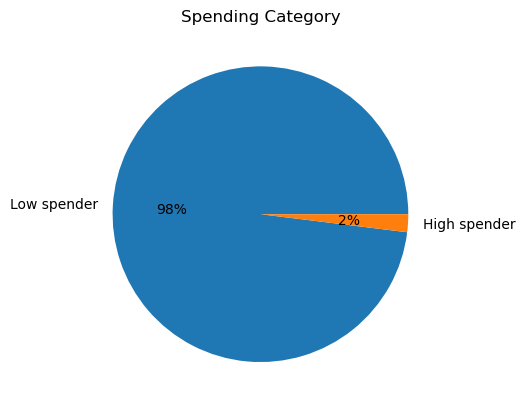

In [111]:
# Creating spending flag pie chart
spending_flag_pie = df['spending_flag'].value_counts(dropna = False).plot.pie(title = 'Spending Category', label = '', autopct = ('%1.f%%'))


In [146]:
# Exporting spending flag pie chart

spending_flag_pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualization', 'low_vs_high_spender.png'))

## Relation between Customer Loyalty and Orders

In [112]:
df['loyalty_flag'].value_counts(dropna = False)

Regular customer    15876776
Loyal customer      10284093
New customer         4803695
Name: loyalty_flag, dtype: int64

In [113]:
df['order_freq_flag'].value_counts(dropna = False)

Frequent customer        21204476
Regular customer          6865113
Non-frequent customer     2894975
Name: order_freq_flag, dtype: int64

In [114]:
crosstab_loy_freq = pd.crosstab(df['loyalty_flag'], df['order_freq_flag'], dropna = False)

In [115]:
crosstab_loy_freq

order_freq_flag,Frequent customer,Non-frequent customer,Regular customer
loyalty_flag,,,
Loyal customer,10279960,0,4133
New customer,1293294,1983500,1526901
Regular customer,9631222,911475,5334079


Text(0.5, 0, 'Type of Customer')

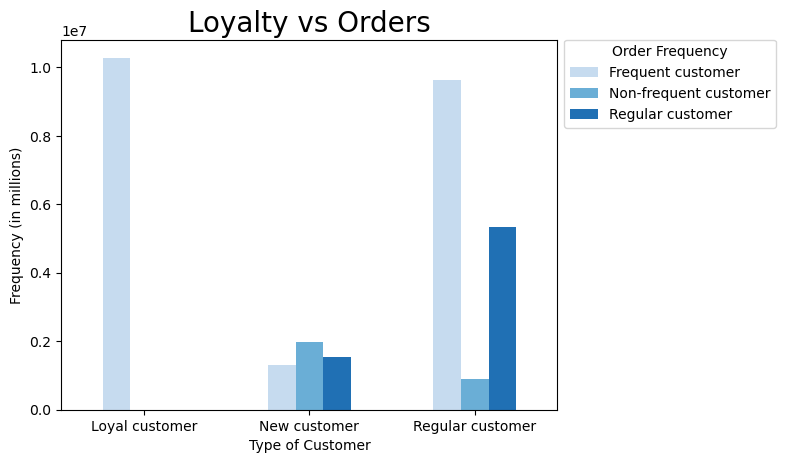

In [119]:
# Creating a bar chart for customer loyalty and order
bar_loyal_Freq = crosstab_loy_freq.plot(kind = 'bar', rot = 0, color = sns.color_palette('Blues', 3))
bar_loyal_Freq.legend(title = 'Order Frequency', bbox_to_anchor = (1, 1.02), loc = 'upper left')
plt.title('Loyalty vs Orders', fontsize = 20)
plt.ylabel('Frequency (in millions)')
plt.xlabel('Type of Customer')

In [162]:
# Exporting loyalty and order frequency distribution
bar_loyal_Freq.figure.savefig(os.path.join(path, '04 Analysis', 'Visualization', 'loyalty_freq_distribution.png'), bbox_inches='tight')

In [149]:
# Exporting Final Files
df.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'Final_Order_Product_Customer_Dataset.pkl'))

In [152]:
df_department.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'Final_department.pkl'))